<a href="https://colab.research.google.com/github/andreadosi1986/andreadosi/blob/master/StatisticalSVDAnalysisCorrected10SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!pip install rasterio
!pip install fiona
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 96 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.animation as animation
from matplotlib import rc
import rasterio
from rasterio import mask
import fiona
import skimage
from skimage.measure import regionprops
import random
import pandas as pd
from skimage import filters
import patchify
import tifffile as tiff
import tensorflow as tf
import keras
from scipy.ndimage import rotate
import fiona
from rasterio.plot import reshape_as_image
import tensorflow.keras.utils

In [6]:
sardinia_full = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/sardinia_cut10SV.npy')
sardinia_mask_full = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/SardiniaMask3Channels.npy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


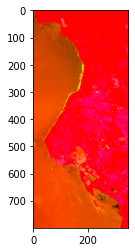

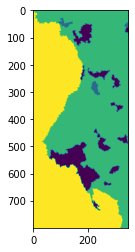

In [ ]:
plt.imshow(sardinia_full[:,:,0:3])
plt.show()
plt.imshow(sardinia_mask_full)
plt.show()

In [7]:
mining_index = np.nonzero(np.where(sardinia_mask_full==1, 1, 0))
mining_area = sardinia_full[mining_index]
print(mining_area.shape)
vegetation_index = np.nonzero(np.where(sardinia_mask_full==2, 2, 0))
veg_area = sardinia_full[vegetation_index]
print(veg_area.shape)
sea_index = np.nonzero(np.where(sardinia_mask_full==3, 3, 0))
sea_area = sardinia_full[sea_index]
print(sea_area.shape)

(1823, 10)
(139031, 10)
(118180, 10)


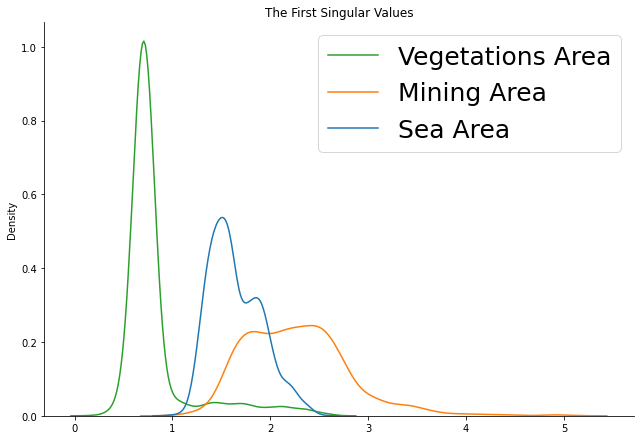

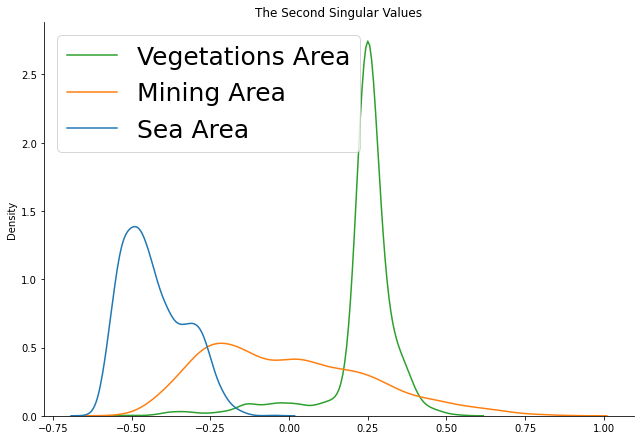

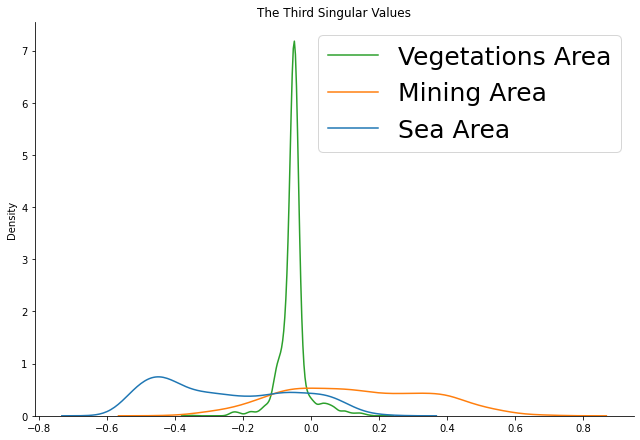

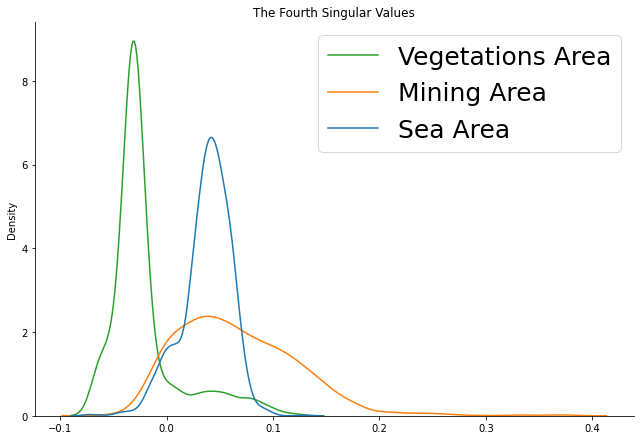

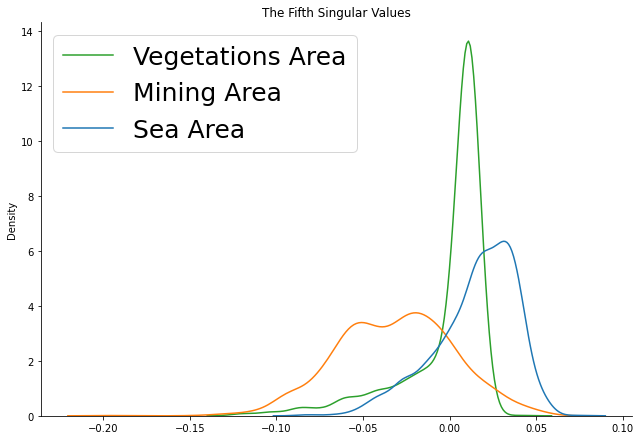

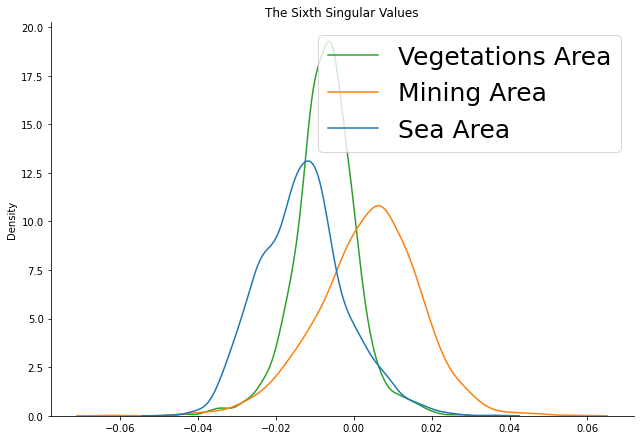

In [9]:
import seaborn as sns
for i in range (6):
  name = ['First', 'Second', 'Third', 'Fourth', 'Fifth','Sixth']
  sns.displot(data=[veg_area[:1823,i],mining_area[:,i],sea_area[:1823,i]], legend = False,  kind= "kde", height=6, aspect=9/6, palette="tab10")
  plt.legend(labels=["Vegetations Area","Mining Area","Sea Area"], prop={'size': 25})
  plt.title("The "+name[i]+" Singular Values") 
  plt.savefig('/content/drive/MyDrive/datamining/prisma/Sardinia/images/'+name[i]+'SVDDistr.pdf', format='pdf')
  #plt.subplot(data)
  plt.show()

In [10]:
#sns.displot(data=[veg_area[:1823,0],mining_area[:,0],sea_area[:1823,0]], legend = False,  kind= "kde", height=6, aspect=9/6, palette="tab10")
#plt.legend(labels=["Vegetations Area","Mining Area","Sea Area"])
#plt.title(" The First Singular Value") 
#plt.savefig("FirstSingValue", bbox_inches='tight')
#plt.show()